## CROP RECOMMENDATION MODEL

In [191]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [192]:
#load dataset
crop=pd.read_csv('Crop_recommendation.csv')

In [193]:
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [194]:
#shape of the dataset
crop.shape

(2200, 8)

In [195]:
#information about dataset
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [196]:
#check null
crop.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [197]:
#check duplicate data
crop.duplicated().sum()

np.int64(0)

In [198]:
#describe dataset
crop.sample(20)

,N,P,K,temperature,humidity,ph,rainfall,label
278,33,75,84,19.462104,18.728320,7.217018,68.814051,chickpea
2110,84,36,28,26.735062,55.551648,6.119892,140.630521,coffee
78,77,36,37,26.884449,81.460337,6.136132,194.576656,rice
1147,7,17,26,34.892267,48.756134,6.414527,91.630745,mango
118,66,53,19,23.093481,60.115938,6.033550,65.497307,maize
1060,111,79,53,28.311933,75.773638,6.165001,119.695765,banana
164,76,48,18,19.295634,69.634812,5.775978,83.210306,maize
275,27,79,82,17.065793,17.540241,6.307005,70.871506,chickpea
889,12,80,19,21.910410,65.216625,5.962001,36.102114,lentil
2025,76,56,39,24.394595,89.891065,6.551130,197.122005,jute


In [199]:
#correlation among numerical columns
crop.select_dtypes(include='number').corr()



,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


<Axes: >

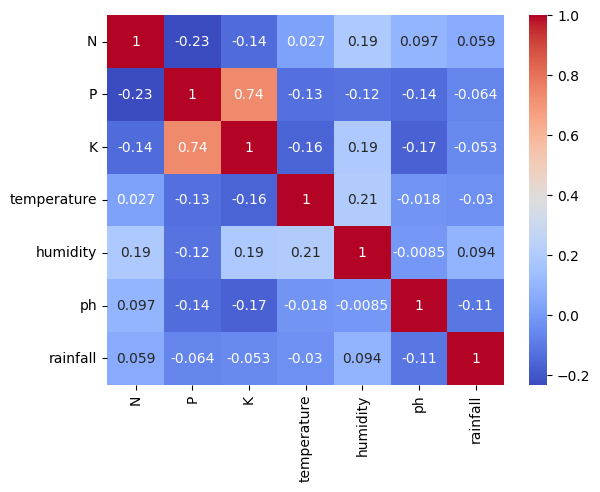

In [200]:
#visualization of correlation
sns.heatmap(crop.select_dtypes(include='number').corr(),cmap='coolwarm',annot=True)


In [201]:
#values in label column
crop['label'].value_counts()

label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute           100
coffee         100
Name: count, dtype: int64

In [202]:
#unique values in label
crop['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

#### Conclusion
This is multi-class classification problem

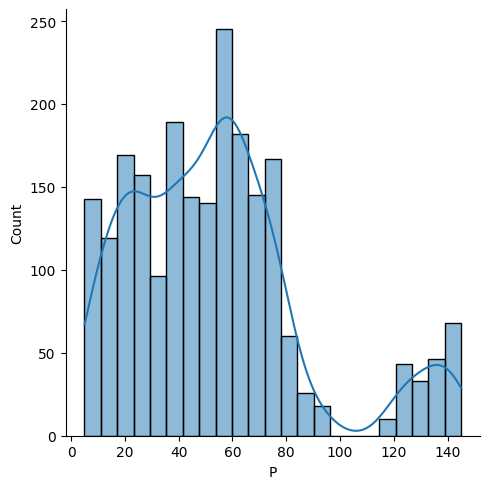

In [203]:
#Distribution
sns.displot(crop['P'],kde=True)

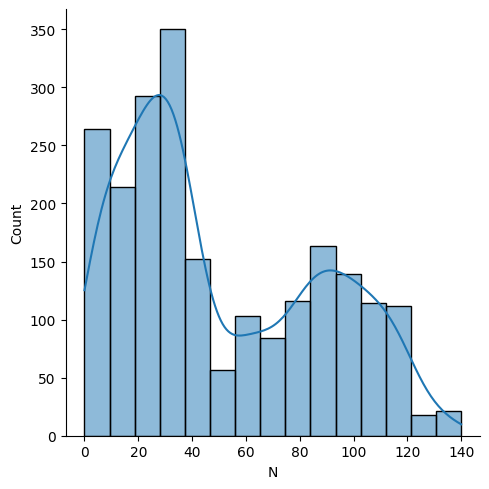

In [204]:
sns.displot(crop['N'],kde=True)


In [205]:
#labeling of crops
crop_dict={'rice':1,'maize':2, 'chickpea':3, 'kidneybeans':4, 'pigeonpeas':5,
       'mothbeans':6, 'mungbean':7, 'blackgram':8, 'lentil':9, 'pomegranate':10,
       'banana':11, 'mango':12, 'grapes':13, 'watermelon':14, 'muskmelon':15, 'apple':16,
       'orange':17, 'papaya':18, 'coconut':19, 'cotton':20, 'jute':21, 'coffee':22}

In [206]:
crop['label']=crop['label'].map(crop_dict)

In [207]:
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,1


In [208]:
#dividing dataset into independent and dependent features
X=crop.drop('label',axis=1)
y=crop['label']

In [209]:
y

0        1
1        1
2        1
3        1
4        1
        ..
2195    22
2196    22
2197    22
2198    22
2199    22
Name: label, Length: 2200, dtype: int64

In [210]:
#splitting dataset into train and test data using scikit learn
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [211]:
X_train.shape,y_train.shape

((1760, 7), (1760,))

In [212]:
#scalling of the dataset
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [213]:
X_train

array([[0.12142857, 0.07857143, 0.045     , ..., 0.9089898 , 0.48532225,
        0.29685161],
       [0.26428571, 0.52857143, 0.07      , ..., 0.64257946, 0.56594073,
        0.17630752],
       [0.05      , 0.48571429, 0.1       , ..., 0.57005802, 0.58835229,
        0.08931844],
       ...,
       [0.07857143, 0.22142857, 0.13      , ..., 0.43760347, 0.46198144,
        0.28719815],
       [0.07857143, 0.85      , 0.995     , ..., 0.76763665, 0.44420505,
        0.18346657],
       [0.22857143, 0.52142857, 0.085     , ..., 0.56099735, 0.54465022,
        0.11879596]], shape=(1760, 7))

In [214]:
#standardisation of the dataset
from sklearn.preprocessing import StandardScaler
stand_scalar=StandardScaler()
X_train=stand_scalar.fit_transform(X_train)
X_test=stand_scalar.transform(X_test)


In [215]:
X_train

array([[-9.03426596e-01, -1.12616170e+00, -6.68506601e-01, ...,
         9.36586183e-01,  1.93473784e-01,  5.14970176e-03],
       [-3.67051340e-01,  7.70358846e-01, -5.70589522e-01, ...,
        -1.00470485e-01,  8.63917548e-01, -6.05290566e-01],
       [-1.17161422e+00,  5.89737842e-01, -4.53089028e-01, ...,
        -3.82774991e-01,  1.05029771e+00, -1.04580687e+00],
       ...,
       [-1.06433917e+00, -5.24091685e-01, -3.35588533e-01, ...,
        -8.98381379e-01, -6.34357580e-04, -4.37358211e-02],
       [-1.06433917e+00,  2.12501638e+00,  3.05234239e+00, ...,
         3.86340190e-01, -1.48467347e-01, -5.69036842e-01],
       [-5.01145154e-01,  7.40255346e-01, -5.11839275e-01, ...,
        -4.18045489e-01,  6.86860180e-01, -8.96531475e-01]],
      shape=(1760, 7))

#### Model Selecting and Training

In [216]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.metrics import accuracy_score

In [217]:
#own pipeline to check for all supervised model
models={
    'LogisticRegression':LogisticRegression(),
    'GaussianNB':GaussianNB(),
    'SVC':SVC(),
    'KNeighborsClassifier':KNeighborsClassifier(),
    'DecisionTreeClassifier':DecisionTreeClassifier(),
    'RandomForestClassifier':RandomForestClassifier(),
    'GradientBoostingClassifier':GradientBoostingClassifier(),
    'AdaBoostClassifier':AdaBoostClassifier()
}

In [218]:
for name,model in models.items():
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    score=accuracy_score(y_test,y_pred)
    print(f"{name} model with accuracy: {score}")

LogisticRegression model with accuracy: 0.9636363636363636
GaussianNB model with accuracy: 0.9954545454545455
SVC model with accuracy: 0.9681818181818181
KNeighborsClassifier model with accuracy: 0.9659090909090909
DecisionTreeClassifier model with accuracy: 0.9863636363636363
RandomForestClassifier model with accuracy: 0.9931818181818182
GradientBoostingClassifier model with accuracy: 0.9818181818181818
AdaBoostClassifier model with accuracy: 0.14545454545454545


### Implication
#### Taking Random Forest Classsifier as out model as it has highest accuracy

In [225]:
random_classify=RandomForestClassifier()
random_classify.fit(X_train,y_train)
y_pred=random_classify.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.9954545454545455


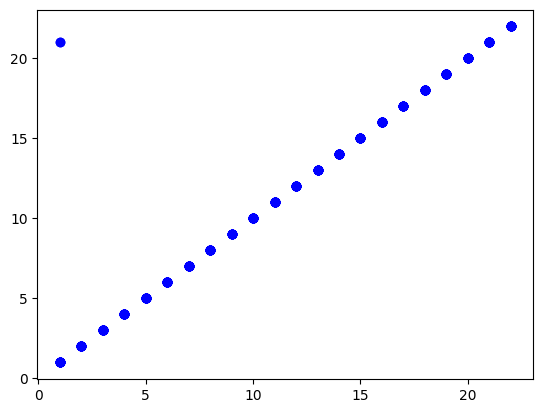

In [230]:
plt.scatter(y_test, y_pred, color='blue')
plt.show()

### Creating function for prediction

In [221]:
crop.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [222]:
def recommendation(N,P,K,temperature,humidity,ph,rainfall):
    test_value=np.array([[N,P,K,temperature,humidity,ph,rainfall]])
    s=scaler.transform(test_value)
    ss=stand_scalar.transform(s)
    prediction=random_classify.predict(ss).reshape(1,-1)
    return prediction[0]


In [223]:
import pickle
pickle.dump(random_classify,open('model.pkl','wb'))
pickle.dump(scaler,open('min_max_scaler.pkl','wb'))
pickle.dump(stand_scalar,open('standard_scaler.pkl','wb'))
